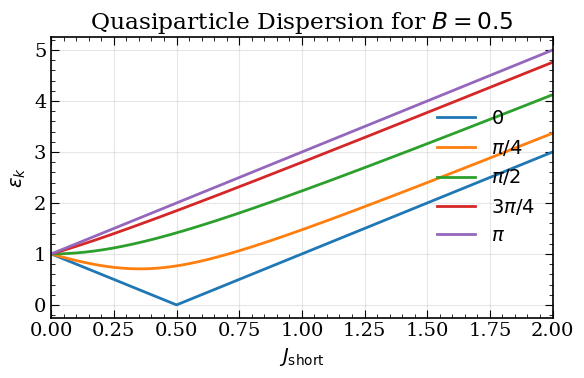

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Parameters -----
B = 0.5
k_values = [0.0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
k_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
J_min, J_max, J_points = 0.0, 2.0, 800

# ----- Dispersion function -----
def epsilon(k, Jshort, B=1.0):
    return 2.0 * np.sqrt((Jshort - B*np.cos(k))**2 + (B*np.sin(k))**2)

# ----- Aesthetics (publication-friendly) -----
plt.rcParams.update({
    "font.family": "serif",        # 'Times New Roman' if available
    "font.size": 14,
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "legend.frameon": False,
    "pdf.fonttype": 42,            # embed fonts in vector form
})

# ----- Compute curves -----
J = np.linspace(J_min, J_max, J_points)
curves = [epsilon(k, J, B=B) for k in k_values]

# ----- Plot -----
plt.figure(figsize=(6, 4))
for y, lbl in zip(curves, k_labels):
    plt.plot(J, y, linewidth=2.0, label=lbl)

plt.xlabel(r"$J_{\mathrm{short}}$")
plt.ylabel(r"$\epsilon_k$")
plt.title(r"Quasiparticle Dispersion for $B = 0.5$")
plt.xlim(J_min, J_max)

# Ticks (minor + major)
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(which="both", direction="in", top=True, right=True)
ax.tick_params(which="major", length=6)
ax.tick_params(which="minor", length=3)

plt.legend(loc="center right")

plt.tight_layout()

# ----- Save PDF -----
plt.savefig("dispersion_B1.pdf", format="pdf", bbox_inches="tight")
plt.show()


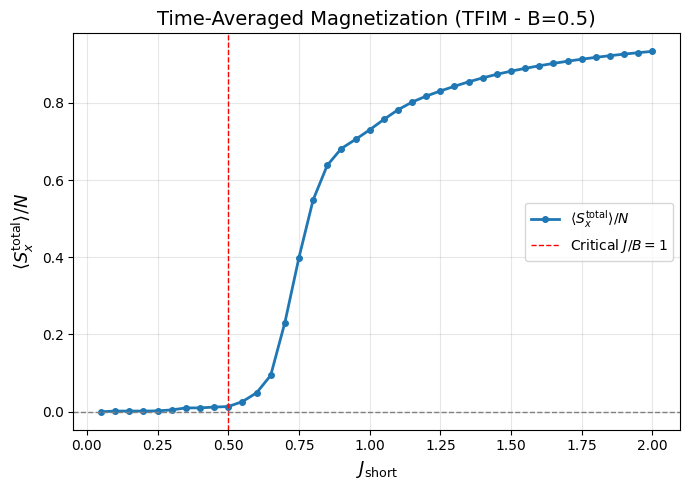

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Your interpolated dataset (every 0.05 step)
data = [
    [0.05, -0.000017],
    [0.10, 0.001518],
    [0.15, 0.001700],
    [0.20, 0.001576],
    [0.25, 0.002191],
    [0.30, 0.004593],
    [0.35, 0.009827],
    [0.40, 0.009842],
    [0.45, 0.01195],
    [0.50, 0.013348],
    [0.55, 0.026127],
    [0.60, 0.048820],
    [0.65, 0.094087],
    [0.70, 0.230379],
    [0.75, 0.399334],
    [0.80, 0.548387],
    [0.85, 0.638107],
    [0.90, 0.681612],
    [0.95, 0.705153],
    [1.00, 0.729922],
    [1.05, 0.756857],
    [1.10, 0.781837],
    [1.15, 0.801730],
    [1.20, 0.817367],
    [1.25, 0.830572],
    [1.30, 0.842827],
    [1.35, 0.854249],
    [1.40, 0.864615],
    [1.45, 0.873776],
    [1.50, 0.881891],
    [1.55, 0.889192],
    [1.60, 0.895882],
    [1.65, 0.902032],
    [1.70, 0.907682],
    [1.75, 0.912872],
    [1.80, 0.917639],
    [1.85, 0.922020],
    [1.90, 0.926051],
    [1.95, 0.929768],
    [2.00, 0.933209],
]

# Convert to numpy arrays
data = np.array(data)
x, y = data[:,0], data[:,1]

# Plot
plt.figure(figsize=(7,5))
plt.plot(x, y, marker='o', markersize=4, lw=2, label=r'$\langle S_x^{\rm total}\rangle/N$')
plt.axvline(0.5, color='red', linestyle='--', lw=1, label='Critical $J/B=1$')
plt.axhline(0, color='gray', linestyle='--', lw=1)

plt.xlabel(r'$J_{\rm short}$', fontsize=13)
plt.ylabel(r'$\langle S_x^{\rm total}\rangle/N$', fontsize=13)
plt.title("Time-Averaged Magnetization (TFIM - B=0.5)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("TFIM_DQPT.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Input data ===
data = [
    (0.05, 0.188719), (0.2, 0.0952229), (0.35, 0.0964997), (0.5, 0.0844902),
    (0.65, 0.0810795), (0.8, 0.0900463), (0.95, 0.125663), (1.1, 0.212791),
    (1.25, 0.31166), (1.4, 0.422188), (1.55, 0.50832), (1.7, 0.581839),
    (1.85, 0.641897), (2.0, 0.691248), (2.15, 0.731981), (2.3, 0.765153),
    (2.45, 0.792494), (2.6, 0.815434), (2.75, 0.834613), (2.9, 0.850845),
    (3.05, 0.864765), (3.2, 0.876858), (3.35, 0.887148), (3.5, 0.896142),
    (3.65, 0.9041), (3.8, 0.910852), (3.95, 0.916769), (4.1, 0.922012),
    (4.25, 0.926446), (4.4, 0.930258), (4.55, 0.93356), (4.7, 0.936249),
    (4.85, 0.938415), (5.0, 0.940114)
]

# Convert to numpy arrays
J, Mx = np.array(data).T

# Compute numerical derivative (susceptibility-like quantity)
dMx_dJ = np.gradient(Mx, J)

# Find critical point = maximum slope
J_crit = J[np.argmax(dMx_dJ)]
chi_max = np.max(dMx_dJ)

print(f"Estimated critical point: J_c ≈ {J_crit:.3f}")
print(f"Maximum slope (susceptibility): χ_max ≈ {chi_max:.3f}")

# === Plot results ===
fig, ax1 = plt.subplots()

# Magnetization curve
ax1.plot(J, Mx, 'b-o', label=r'$\overline{M_x}$')
ax1.set_xlabel(r'$J_{short}$')
ax1.set_ylabel(r'$\overline{M_x}$', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(J_crit, color='gray', linestyle='--', alpha=0.7)

# Derivative curve on secondary axis
ax2 = ax1.twinx()
ax2.plot(J, dMx_dJ, 'r--', label=r'$\chi_x = d\overline{M_x}/dJ$')
ax2.set_ylabel(r'$\chi_x$', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.show()
